In [2]:
'''
종속변수가 두가지 범주로 나뉠 때(성공/실패 등) 주로 사용함
오즈: 특정 사건이 발생할 확률과 그 사건이 발생하지 않을 확률 간의 비율
odds = P(Y=1)/(1-P(Y=1))
P(Y=1)=0.75 이면 odds = 3이다
로그변환: 종속 변수의 로그 오즈를 독립 변수들의 선형 결합으로 모델링함
log(odds)=log(P(Y=1)/(1-P(Y=1)))=B0+B1X1+B2X2+B3X3+...BnXn
Bn: 모델의 계수(가중치)
Xn: 독립변수(설명 변수)
P에 대해 정리하면
P(Y=1) = e^(B0+B1X1+B2X2+B3X3+...BnXn)/1+e^(B0+B1X1+B2X2+B3X3+...BnXn)=e^z/1+e^z 단 z = B0+B1X1+B2X2+B3X3+...BnXn
P(Y=1) = 1/1+e^-z=sigmoid(z) 시그모이드 함수
'''

'\n종속변수가 두가지 범주로 나뉠 때(성공/실패 등) 주로 사용함\n오즈: 특정 사건이 발생할 확률과 그 사건이 발생하지 않을 확률 간의 비율\nodds = P(Y=1)/(1-P(Y=1))\nP(Y=1)=0.75 이면 odds = 3이다\n로그변환: 종속 변수의 로그 오즈를 독립 변수들의 선형 결합으로 모델링함\nlog(odds)=log(P(Y=1)/(1-P(Y=1)))=B0+B1X1+B2X2+B3X3+...BnXn\nBn: 모델의 계수(가중치)\nXn: 독립변수(설명 변수)\nP에 대해 정리하면\nP(Y=1) = e^(B0+B1X1+B2X2+B3X3+...BnXn)/1+e^(B0+B1X1+B2X2+B3X3+...BnXn)=e^z/1+e^z 단 z = B0+B1X1+B2X2+B3X3+...BnXn\nP(Y=1) = 1/1+e^-z=sigmoid(z) 시그모이드 함수\n'

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=1, n_samples=300,
                           n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=0.5,
                           random_state=0)
'''
n_features = 1: 독립 변수 1개
n_samples = 300: 샘플 개수 300
n_redundant = 0: 선형 종속 변수 개수
n_informative = 1: 실질적으로 영향 주는 변수 개수
n_clusters_per_class = 1: 클래스당 군집 개수
class_sep = 0.5: 클래스의 데이터가 겹치는 정도. 클수록 잘 분리되어있음
random_state = 0: 매번 같은 데이터 생성
'''

'\nn_features = 1: 독립 변수 1개\nn_samples = 300: 샘플 개수 300\nn_redundant = 0: 선형 종속 변수 개수\nn_informative = 1: 실질적으로 영향 주는 변수 개수\nn_clusters_per_class = 1: 클래스당 군집 개수\nclass_sep = 0.5: 클래스의 데이터가 겹치는 정도. 클수록 잘 분리되어있음\nrandom_state = 0: 매번 같은 데이터 생성\n'

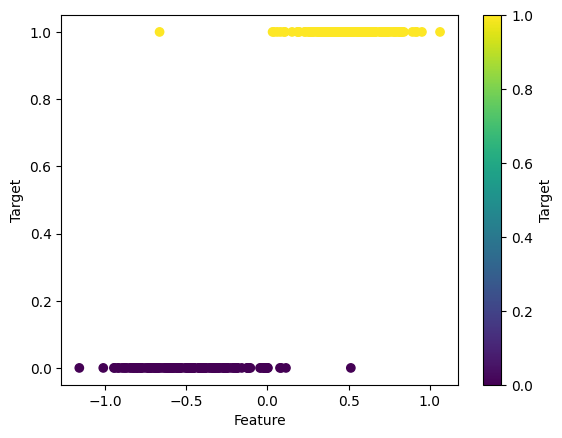

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c=y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.colorbar(label='Target')
plt.show()

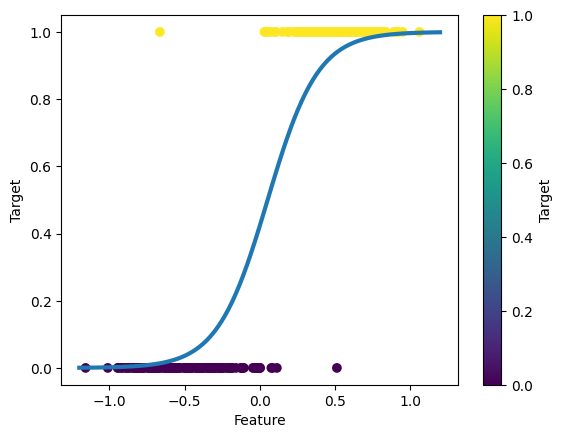

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X, y)

import numpy as np

x_data = np.linspace(-1.2, 1.2, 100).reshape(-1, 1)
pred = model.predict_proba(x_data)[:, 1] # 0과 1에 속할 확률을 100x2로 반환한 후 1에 속할 확률만 catch
plt.plot(x_data, pred, lw = 3)

plt.scatter(X, y, c=y, )
plt.xlabel('Feature')
plt.ylabel('Target')
plt.colorbar(label='Target')
plt.show()

In [6]:
'''

매개변수	설명
penalty	정규화 종류. 'l1', 'l2', 'elasticnet', 'none' 중 선택. 기본값은 'l2'.
dual	이중 또는 원시 방법 선택. 기본값은 False.
tol	최적화 중단을 위한 허용 오차. 기본값은 1e-4.
C	정규화 강도의 역수. 값이 작을수록 강한 정규화. 기본값은 1.0.
fit_intercept	모델에 절편(상수 항) 포함 여부. 기본값은 True.
intercept_scaling	절편에 적용되는 스케일링 팩터. fit_intercept가 True일 때 사용.
class_weight	클래스 불균형을 처리하기 위한 가중치. 기본값은 None.
random_state	난수 발생기 시드. 결과 재현성을 위함.
solver	최적화 문제를 해결하기 위한 알고리즘. 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' 등 선택 가능.
max_iter	최적화를 위한 최대 반복 횟수. 기본값은 100.
multi_class	다중 클래스 분류 전략. 'auto', 'ovr', 'multinomial' 중 선택.
verbose	로그 출력 상세도.
warm_start	이전 호출의 솔루션을 재사용하여 피팅을 초기화 여부. 기본값은 False.
n_jobs	병렬 처리를 위한 CPU 코어 수. 기본값은 None (1개 코어 사용).'''

"\n\n매개변수\t설명\npenalty\t정규화 종류. 'l1', 'l2', 'elasticnet', 'none' 중 선택. 기본값은 'l2'.\ndual\t이중 또는 원시 방법 선택. 기본값은 False.\ntol\t최적화 중단을 위한 허용 오차. 기본값은 1e-4.\nC\t정규화 강도의 역수. 값이 작을수록 강한 정규화. 기본값은 1.0.\nfit_intercept\t모델에 절편(상수 항) 포함 여부. 기본값은 True.\nintercept_scaling\t절편에 적용되는 스케일링 팩터. fit_intercept가 True일 때 사용.\nclass_weight\t클래스 불균형을 처리하기 위한 가중치. 기본값은 None.\nrandom_state\t난수 발생기 시드. 결과 재현성을 위함.\nsolver\t최적화 문제를 해결하기 위한 알고리즘. 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' 등 선택 가능.\nmax_iter\t최적화를 위한 최대 반복 횟수. 기본값은 100.\nmulti_class\t다중 클래스 분류 전략. 'auto', 'ovr', 'multinomial' 중 선택.\nverbose\t로그 출력 상세도.\nwarm_start\t이전 호출의 솔루션을 재사용하여 피팅을 초기화 여부. 기본값은 False.\nn_jobs\t병렬 처리를 위한 CPU 코어 수. 기본값은 None (1개 코어 사용)."

In [7]:
import statsmodels.api as sm

X_con = sm.add_constant(X) # 상수항 추가
sm_model = sm.Logit(y, X_con) # 모델 생성
result = sm_model.fit() # 모델 학습
print(result.summary()) # 결과 확인 R느낌인듯
'''
우도란 주어진 데이터가 특정 모수에 의해 나타날 확률. 여기선 모수가 변수임
최대 우도 추정은 모수가 해당 값일 때 이 데이터를 가장 잘 설명할 것 같은 모수를 찾는 것임.
Optimization terminated successfully.
         Current function value: 0.095672
         Iterations 10
                           Logit Regression Results
==============================================================================
Dep. Variable(종속변수):                      y   No. Observations(분석에 사용된 관측치의 수):                  300
Model:                          Logit   Df Residuals(잔차 자유도):                      298
Method(모델 최적화 방법: 최대 우도 추정법):                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2025   Pseudo R-squ.(이 모델이 데이터의 86%를 설명하고 있음):                  0.8620
Time:                        08:34:08   Log-Likelihood(로그 우도값):                -28.702
converged:                       True   LL-Null(모델 없이 로그 우도 값):                       -207.94
Covariance Type:            nonrobust   LLR p-value:                 6.018e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8416      0.383     -2.197      0.028      -1.592      -0.091
x1            12.0364      1.878      6.409      0.000       8.355      15.718
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.'''

Optimization terminated successfully.
         Current function value: 0.095672
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.8620
Time:                        16:50:41   Log-Likelihood:                -28.702
converged:                       True   LL-Null:                       -207.94
Covariance Type:            nonrobust   LLR p-value:                 6.018e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8416      0.383     -2.197      0.028      -1.592      -0.091
x1            12.0364      1

'\n우도란 주어진 데이터가 특정 모수에 의해 나타날 확률. 여기선 모수가 변수임\n최대 우도 추정은 모수가 해당 값일 때 이 데이터를 가장 잘 설명할 것 같은 모수를 찾는 것임.\nOptimization terminated successfully.\n         Current function value: 0.095672\n         Iterations 10\n                           Logit Regression Results\n==============================================================================\nDep. Variable(종속변수):                      y   No. Observations(분석에 사용된 관측치의 수):                  300\nModel:                          Logit   Df Residuals(잔차 자유도):                      298\nMethod(모델 최적화 방법: 최대 우도 추정법):                           MLE   Df Model:                            1\nDate:                Thu, 23 Jan 2025   Pseudo R-squ.(이 모델이 데이터의 86%를 설명하고 있음):                  0.8620\nTime:                        08:34:08   Log-Likelihood(로그 우도값):                -28.702\nconverged:                       True   LL-Null(모델 없이 로그 우도 값):                       -207.94\nCovariance Type:            nonrobust   LLR p-value:                 6.018e-80\

In [8]:
import numpy as np
import pandas as pd
# 데이터 생성
np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
num_rows = 3000

data = {
    "ID": [f"TRAIN_{str(i).zfill(4)}" for i in range(num_rows)],
    "Age": np.random.randint(15, 26, size=num_rows),  # 15~25 사이 정수
    "Height": np.random.randint(160, 191, size=num_rows),  # 160~190 사이 정수
    "Weight": np.random.randint(60, 91, size=num_rows),  # 60~90 사이 정수
    "PaceTotal": np.random.uniform(4, 9, size=num_rows).round(4),  # 4~9 사이 실수
    "ShootingTotal": np.random.uniform(2, 8, size=num_rows).round(4),  # 2~8 사이 실수
    "PassingTotal": np.random.uniform(0, 7, size=num_rows).round(4),  # 0~7 사이 실수
    "Composure": np.random.uniform(3, 9, size=num_rows).round(4),  # 3~9 사이 실수
    "Prospect": np.random.randint(0, 2, size=num_rows)  # 0 또는 1
}
# 데이터 생성 (Prospect 열 제외)
num_rows = 2000

data_without_prospect = {
    "ID": [f"TRAIN_{str(i).zfill(4)}" for i in range(num_rows)],
    "Age": np.random.randint(15, 26, size=num_rows),  # 15~25 사이 정수
    "Height": np.random.randint(160, 191, size=num_rows),  # 160~190 사이 정수
    "Weight": np.random.randint(60, 91, size=num_rows),  # 60~90 사이 정수
    "PaceTotal": np.random.uniform(4, 9, size=num_rows).round(4),  # 4~9 사이 실수
    "ShootingTotal": np.random.uniform(2, 8, size=num_rows).round(4),  # 2~8 사이 실수
    "PassingTotal": np.random.uniform(0, 7, size=num_rows).round(4),  # 0~7 사이 실수
    "Composure": np.random.uniform(3, 9, size=num_rows).round(4),  # 3~9 사이 실수
}


# 데이터프레임 생성
train = pd.DataFrame(data)
test = pd.DataFrame(data_without_prospect)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
train_x = train.drop(columns=["ID", "Prospect"])
test_x = test.drop(columns=["ID"]) # 학습에 필요 없는 데이터 삭제
train_y = train["Prospect"]

# 표준화
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# 스케일링된 데이터 프레임 생성
columns = train_x.columns
train_x_df = pd.DataFrame(train_x_scaled, columns = columns)
test_x_df = pd.DataFrame(train_x_scaled, columns = columns)

train_x_df = sm.add_constant(train_x_df)
test_x_df = sm.add_constant(test_x_df)

display(train_x_df)
display(test_x_df)



,const,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,Composure
0,1.0,0.351677,0.531555,1.571895,-1.698840,-1.107251,-1.507915,-0.931483
1,1.0,-0.604255,0.531555,0.658135,-0.150156,-0.945733,-1.235460,1.586756
2,1.0,1.626253,-0.258554,-0.712504,-0.589340,-1.643135,0.668793,-1.645989
3,1.0,0.670321,0.418682,-0.826724,-1.542662,0.782419,1.359557,-1.254150
4,1.0,-0.285611,-0.258554,1.115015,-0.172546,1.086337,0.458122,0.256186
...,...,...,...,...,...,...,...,...
2995,1.0,0.988965,1.660281,-1.397824,0.512857,1.282442,0.661680,-1.461783
2996,1.0,0.033033,-1.613025,1.229235,-1.160107,-0.213977,0.014194,-0.475263
2997,1.0,-0.285611,-1.500153,-1.626264,-1.607558,-1.576801,0.125922,-1.104822
2998,1.0,-0.922899,1.095918,-1.626264,-1.237404,-0.880210,0.837331,1.625139


,const,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,Composure
0,1.0,0.351677,0.531555,1.571895,-1.698840,-1.107251,-1.507915,-0.931483
1,1.0,-0.604255,0.531555,0.658135,-0.150156,-0.945733,-1.235460,1.586756
2,1.0,1.626253,-0.258554,-0.712504,-0.589340,-1.643135,0.668793,-1.645989
3,1.0,0.670321,0.418682,-0.826724,-1.542662,0.782419,1.359557,-1.254150
4,1.0,-0.285611,-0.258554,1.115015,-0.172546,1.086337,0.458122,0.256186
...,...,...,...,...,...,...,...,...
2995,1.0,0.988965,1.660281,-1.397824,0.512857,1.282442,0.661680,-1.461783
2996,1.0,0.033033,-1.613025,1.229235,-1.160107,-0.213977,0.014194,-0.475263
2997,1.0,-0.285611,-1.500153,-1.626264,-1.607558,-1.576801,0.125922,-1.104822
2998,1.0,-0.922899,1.095918,-1.626264,-1.237404,-0.880210,0.837331,1.625139


In [10]:
# 학습 데이터셋과 검증 데이터셋 분리
train_x, val_x, train_y, val_y = train_test_split(train_x_df, train_y, test_size = 0.2, random_state = 42)


In [11]:
model = sm.Logit(train_y, train_x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.692276
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Prospect   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                0.001129
Time:                        16:50:41   Log-Likelihood:                -1661.5
converged:                       True   LL-Null:                       -1663.3
Covariance Type:            nonrobust   LLR p-value:                    0.8073
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0275      0.041      0.673      0.501      -0.053       0.108
Age              -0.0065      0.041     -0.160      0.873      -0.087       0.073
Height           -0.0266      0.041     -0.650      0.516      -0.107       0.054
Weight           -0.0436      0.041     -1.071      0.284      -0.123       0.036
PaceTotal        -0.0109      0.041     -0.264      0.792      -0.091       0.070
ShootingTotal     0.0345      0.041      0.849      0.396      -0.045       0.114
PassingTotal     -0.0110      0.041     -0.272      0.785      -0.091       0.068
Composure         0.0457      0.041      1.119      0.263      -0.034       0.126
=================================================================================
"""

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

pred = results.predict(val_x)
pred = (pred > 0.5).astype(int)
conf_matrix = confusion_matrix(val_y, pred)
print(conf_matrix)

print(classification_report(val_y, pred))

[[110 209]
 [ 98 183]]
              precision    recall  f1-score   support

           0       0.53      0.34      0.42       319
           1       0.47      0.65      0.54       281

    accuracy                           0.49       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.50      0.49      0.48       600



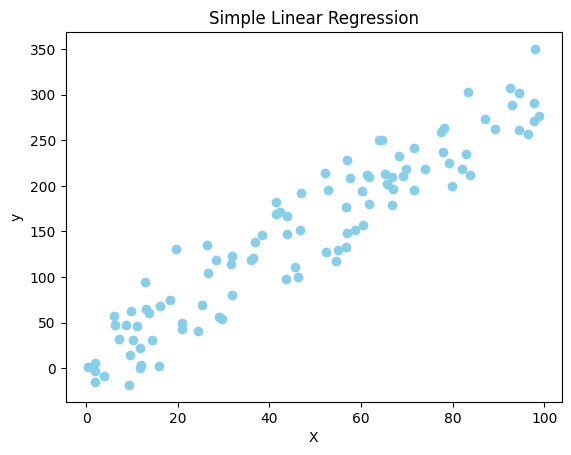

In [15]:
# 회귀분석 코드
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 100 # 0-100 랜덤 값 100 * 1 array로 생성
y = 3 * X + np.random.randn(100, 1) * 30 # 정규 분포를 따르는 오차 추가
X_sm = sm.add_constant(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

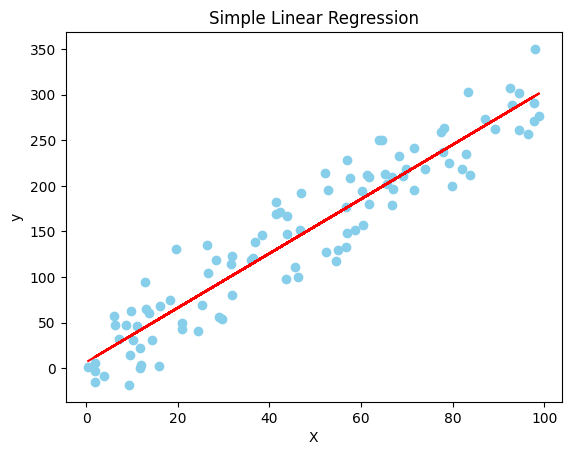

In [18]:
# sklearn.LinearRegression 사용
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.plot(X, y_pred, color='red')  # 회귀선
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

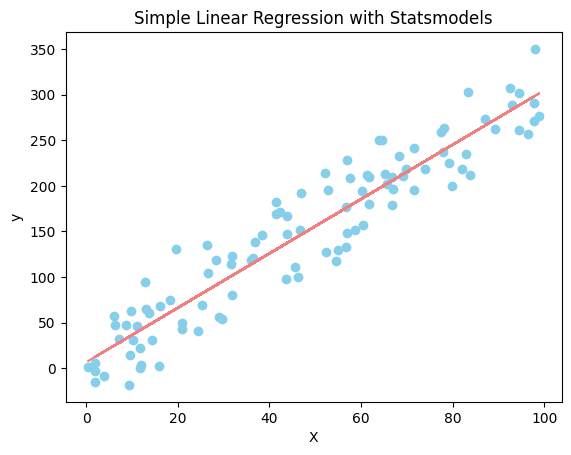

In [21]:
# Statsmodels 사용
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도 (하늘색)
plt.plot(X, results.predict(X_sm), color='lightcoral')  # 회귀선 (밝은 주황색)
plt.title('Simple Linear Regression with Statsmodels')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

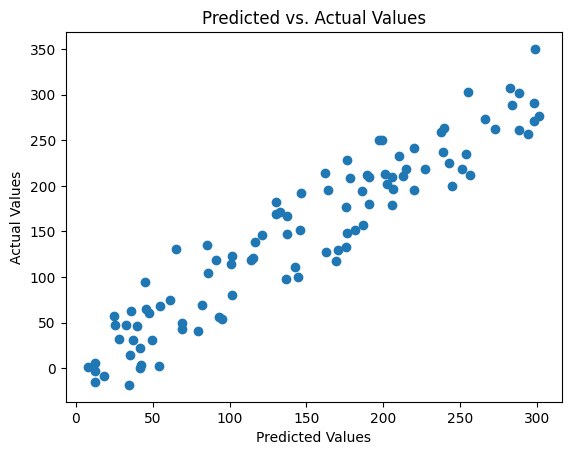

In [25]:
predicted_values = results.predict(X_sm)
plt.scatter(predicted_values, y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

Durbin-Watson: 2.083225232123534 

ShapiroResult(statistic=np.float64(0.9672574594314456), pvalue=np.float64(0.013686444210489727))
KstestResult(statistic=np.float64(0.4998424117503809), pvalue=np.float64(1.257569853203881e-23), statistic_location=np.float64(3.6024957959775463), statistic_sign=np.int8(-1))


<Figure size 600x400 with 0 Axes>

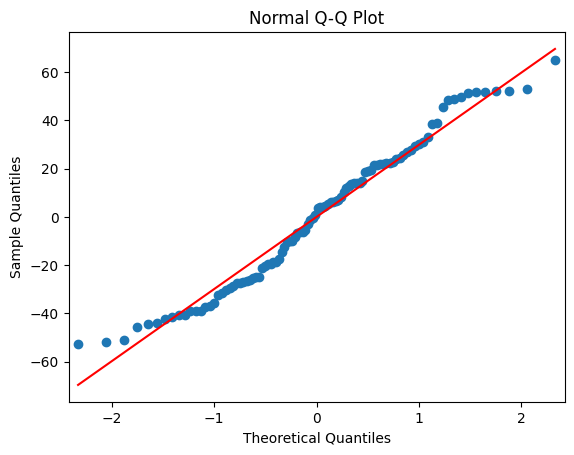

In [35]:
# 오차의 독립성 검증
print('Durbin-Watson:', sm.stats.durbin_watson(results.resid), '\n')
# 오차의 정규성 검증
from scipy import stats
# 잔차 계산
residuals = results.resid
# Shapiro-Wilk 검정
shapiro_test = stats.shapiro(residuals)
print(shapiro_test)

# Kolmogorov-Smirnov(K-S) 검정
ks_test = stats.kstest(residuals, 'norm')
print(ks_test)

# Q-Q plot
plt.figure(figsize = (6, 4))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

(np.float64(0.037989958447137706), np.float64(0.8454633043549206))


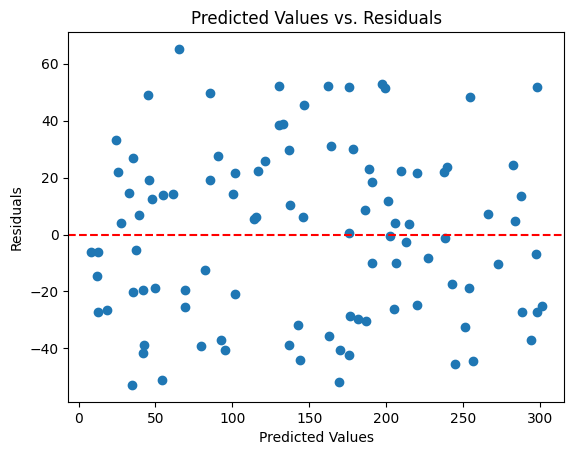

In [42]:
# 오차의 등분산성 검증
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

residuals = results.resid

bp_test = het_breuschpagan(residuals, results.model.exog)
print(bp_test[0:2]) # 통계량, p값

plt.scatter(predicted_values, results.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [48]:
# 다중공선성
import pandas as pd

# 데이터셋 생성
np.random.seed(0)
X1 = np.random.rand(100) * 10  # 첫 번째 독립 변수
X2 = X1 + np.random.normal(0, 1, 100) * 2  # 두 번째 독립 변수, X1과 강한 상관 관계
X3 = np.random.rand(100) * 10  # 세 번째 독립 변수, 상대적으로 독립적
y = 5 + 2 * X1 + 3 * X2 + 7 * X3 + np.random.normal(0, 2, 100)  # 종속 변수

# DataFrame으로 변환
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
df

# VIF 분산 팽창계수: 독립변수가 다른 독립변수들과 어느정도 선형관계가 있는지 나타냄
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['X1', 'X2', 'X3']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
print(X.values)
print(X.shape)
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

[[ 1.          5.48813504  3.15783536  2.07470075]
 [ 1.          7.15189366  8.95354664  4.24685469]
 [ 1.          6.02763376  6.95895864  3.7416998 ]
 [ 1.          5.44883183  2.37634446  4.63575424]
 [ 1.          4.23654799  7.21305238  2.77628706]
 [ 1.          6.45894113 10.25071948  5.86784346]
 [ 1.          4.37587211  6.73343125  8.63855606]
 [ 1.          8.91773001  8.55788034  1.17531856]
 [ 1.          9.63662761  7.49512236  5.17379107]
 [ 1.          3.83441519  5.94331864  1.32068106]
 [ 1.          7.91725038  7.11089649  7.16859681]
 [ 1.          5.2889492   7.73383934  3.96059703]
 [ 1.          5.68044561  6.09699557  5.65421312]
 [ 1.          9.25596638 11.20924446  1.83279836]
 [ 1.          0.71036058  1.42309338  1.44847759]
 [ 1.          0.871293    2.28443933  4.88056281]
 [ 1.          0.20218397  0.22318402  3.55612738]
 [ 1.          8.32619846 11.89793944  9.40431945]
 [ 1.          7.78156751  8.03539169  7.65325254]
 [ 1.          8.70012148  9.50

,feature,VIF
0,const,5.858475
1,X1,3.112313
2,X2,3.218998
3,X3,1.064651
